In [90]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import RFE, RFECV, f_regression, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import  KNeighborsClassifier
from datetime import datetime as dt
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.feature_selection import ColumnSelector
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [3]:
# Displaying all columns
pd.set_option('display.max_columns', None)

#Display all data in columns
pd.set_option("display.max_colwidth", None)

np.set_printoptions(threshold=None, edgeitems=None, linewidth=None, suppress=None)
pd.set_option("display.max_rows", None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)


In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.shape

(120000, 3)

In [6]:
train_df.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [7]:
train_df['Description_preprocessed'] = train_df['Description']

In [8]:
train_df.head(5)

,Class Index,Title,Description,Description_preprocessed
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.","Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.","Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [9]:
#Dependencies
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/mist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mist/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
train_df.duplicated().sum()

0

In [11]:
train_df.isnull().sum()

Class Index                 0
Title                       0
Description                 0
Description_preprocessed    0
dtype: int64

In [12]:
train_df['Class Index'].value_counts()  #Not imbalanced

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [13]:
#Preprocessing the description

In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [15]:
#Preprocessing 'overview' column

#Lowercasing

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].str.lower()


# Removing HTML tags

import re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(remove_html)
# print(df.head())


#Remove @

def remove_at_the_rate(text):

    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text != "@":
            new.append(word.text)

    return ' '.join(new)

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(remove_at_the_rate)



#Removing URL

import re

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_url)
# print(df.head())


#Remmove punctuation

import string

punc = string.punctuation

def  remove_punc(text):

    return text.translate(str.maketrans('', '', punc))

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_punc)



from autocorrect import Speller

check = Speller()

def check_spell(text):

    return check(text)

# train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(check_spell)


# Removing stop words


from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stop_words(text):
    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text not in stopwords:

            new.append(word.text)

    return ' '.join(new)

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(remove_stop_words)


#Removing Contradictions

import contractions

def remove_contradictions(text):

    return " ".join([contractions.fix(word.text) for word in nlp(text)])

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_contradictions)



def Lemmetization(text):

    return " ".join([word.lemma_ for word in nlp(text)])


# #Stemming

# from nltk.stem.porter import PorterStemmer

# ps = PorterStemmer()
# def stemming(text):

#     return " ".join([ps.stem(word.text) for word in nlp(text)])

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(Lemmetization)




In [16]:
#Preprocesing the 'Title' column

In [28]:
train_df['Title_processed'] = train_df['Title_processed']

In [29]:
#Preprocessing 'overview' column

#Lowercasing

train_df['Title_processed'] = train_df['Title_processed'].str.lower()


# Removing HTML tags

import re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

train_df['Title_processed'] = train_df['Title_processed'].apply(remove_html)
# print(df.head())


#Remove @

def remove_at_the_rate(text):

    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text != "@":
            new.append(word.text)

    return ' '.join(new)

train_df['Title_processed'] = train_df['Title_processed'].apply(remove_at_the_rate)



#Removing URL

import re

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

train_df['Title_processed']= train_df['Title_processed'].apply(remove_url)
# print(df.head())


#Remmove punctuation

import string

punc = string.punctuation

def  remove_punc(text):

    return text.translate(str.maketrans('', '', punc))

train_df['Title_processed']= train_df['Title_processed'].apply(remove_punc)




from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stop_words(text):
    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text not in stopwords:

            new.append(word.text)

    return ' '.join(new)

train_df['Title_processed'] = train_df['Title_processed'].apply(remove_stop_words)


#Removing Contradictions

import contractions

def remove_contradictions(text):

    return " ".join([contractions.fix(word.text) for word in nlp(text)])

train_df['Title_processed']= train_df['Title_processed'].apply(remove_contradictions)



def Lemmetization(text):

    return " ".join([word.lemma_ for word in nlp(text)])



train_df['Title_processed'] = train_df['Title_processed'].apply(Lemmetization)




In [30]:
# train_df.drop(columns='Title_processed', axis=1, inplace=True)

In [31]:
string = train_df.iloc[1, 1]

In [32]:
string.lower()

'carlyle looks toward commercial aerospace (reuters)'

In [33]:
def insert_spaces_at_begining(string):
    string = ' ' + string
    return string

In [34]:
# train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(insert_spaces_at_begining)

In [35]:
train_df['tags'] = train_df['Title_processed'] + train_df['Description_preprocessed']

In [36]:
train_df.head(1)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green


In [37]:
train_df['cnt_words'] = train_df['Description'].apply(lambda x: len(nlp(x)))
train_df['cnt_sentences'] = train_df['Description'].apply(lambda x: len(list(nlp(x).sents)))
train_df['cnt_char'] = train_df['Description'].apply(len)

In [38]:
train_df.head(1)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags,cnt_words,cnt_sentences,cnt_char
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green,20,1,94


In [39]:
#EDA and Preprocessing

In [40]:
def cnt_char(string):
    cnt = len(string)
    return cnt

In [41]:
def cnt_sent(string):
    return len(list(nlp(string).sents))

In [42]:
def cnt_words(string):
    cnt = len(nlp(string))
    return cnt

In [43]:
def avg_word_count(string):
    cnt = cnt_char(string) / cnt_words(string)
    return cnt

In [44]:
def avg_sent_len(string):
    cnt = cnt_words(string) / cnt_sent(string)
    return cnt

In [45]:
def uniques_words(string):
    return len(set(nlp(string).sents))

In [57]:
def punctuations_cnt(text):
    
    import string
    punc = string.punctuation
    cnt = 0
    doc1 = nlp(text)
    for token in doc1.text:
        if token in punc:
            cnt+=1
    return cnt

In [47]:
def find_between_quotes(string):
    x = re.findall(r'(@w[A-Za-z0-9]*)', string)
    return len(x)

In [48]:
def cnt_stopwords(string):
    
    cnt = 0
    
    from nltk.corpus import stopwords

    stopwords = stopwords.words('english')
    doc1 = nlp(string)
    
    for token in doc1.text:
        if token in stopwords:
            cnt += 1 
    return cnt

In [49]:
train_df['tags_initial'] = train_df['Title'] + train_df['Description']

In [50]:
train_df.rename(columns = {'tags':'tags_preprocessed'}, inplace = True)

In [51]:
train_df.head(1)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags_preprocessed,cnt_words,cnt_sentences,cnt_char,tags_initial
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green,20,1,94,"Wall St. Bears Claw Back Into the Black (Reuters)Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."


In [52]:
train_df['uniques_words'] = train_df['tags_initial'].apply(uniques_words)

In [58]:
train_df['punctuations_cnt'] = train_df['tags_initial'].apply(punctuations_cnt)

In [59]:
train_df['find_between_quotes'] = train_df['tags_initial'].apply(find_between_quotes)

In [60]:
train_df['cnt_stopwords'] = train_df['tags_initial'].apply(cnt_stopwords)

In [61]:
train_df['avg_word_count'] = train_df['tags_initial'].apply(avg_word_count)

In [62]:
train_df['avg_sent_len'] = train_df['tags_initial'].apply(avg_sent_len)

In [63]:
#Correlation graph

In [64]:
train_df.head(1)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags_preprocessed,cnt_words,cnt_sentences,cnt_char,tags_initial,uniques_words,punctuations_cnt,find_between_quotes,cnt_stopwords,avg_word_count,avg_sent_len
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green,20,1,94,"Wall St. Bears Claw Back Into the Black (Reuters)Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",1,11,0,40,4.931034,29.0


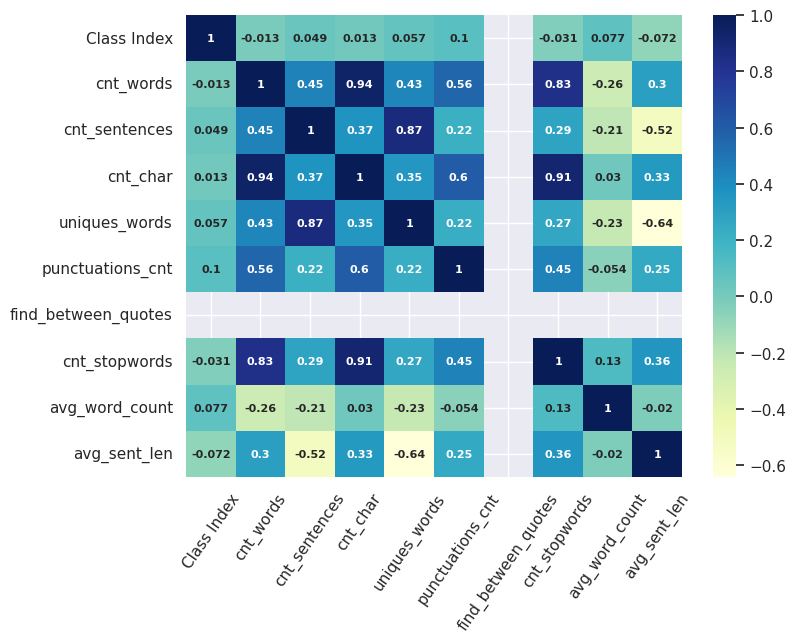

In [65]:
sns.set(font_scale = 1)
plt.figure(figsize=(8,6))
cor_df = train_df[['Class Index', 'cnt_words', 'cnt_sentences', 'cnt_char', 'uniques_words', 'punctuations_cnt', 'find_between_quotes', 'cnt_stopwords', 'avg_word_count', 'avg_sent_len']]
sns.heatmap(cor_df.corr(), annot=True, cmap="YlGnBu", xticklabels=True, yticklabels=True, annot_kws={'fontsize': 8, 'fontweight': 'bold'})
plt.xticks(rotation=55)
plt.show()

In [66]:
#Distplots

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Class Index               120000 non-null  int64  
 1   Title                     120000 non-null  object 
 2   Description               120000 non-null  object 
 3   Description_preprocessed  120000 non-null  object 
 4   Title_processed           120000 non-null  object 
 5   tags_preprocessed         120000 non-null  object 
 6   cnt_words                 120000 non-null  int64  
 7   cnt_sentences             120000 non-null  int64  
 8   cnt_char                  120000 non-null  int64  
 9   tags_initial              120000 non-null  object 
 10  uniques_words             120000 non-null  int64  
 11  punctuations_cnt          120000 non-null  int64  
 12  find_between_quotes       120000 non-null  int64  
 13  cnt_stopwords             120000 non-null  i

In [68]:
features = train_df.columns

In [69]:
features = features[6:]

In [70]:
features = features[[]]

In [71]:
for i in features:
    if i != 'tags_initial':
        sns.distplot(train_df[i])
        plt.xticks(rotation=15)
        plt.show()

In [72]:
features

Index([], dtype='object')

In [73]:
#Powertransfomer?

In [74]:
trnf = ColumnTransformer(transformers=[
    ('power_trnf', PowerTransformer(), ['cnt_words', 'cnt_sentences', 'cnt_char', 'uniques_words', 'punctuations_cnt', 'find_between_quotes', 'cnt_stopwords', 'avg_word_count', 'avg_sent_len'])
], remainder='passthrough')

In [75]:
# train_df_trnf = trnf.fit_transform(train_df)

In [76]:
train_df_trnf = pd.DataFrame(trnf.fit_transform(train_df), columns=trnf.get_feature_names_out())

In [77]:
train_df_trnf.head(1)

,power_trnf__cnt_words,power_trnf__cnt_sentences,power_trnf__cnt_char,power_trnf__uniques_words,power_trnf__punctuations_cnt,power_trnf__find_between_quotes,power_trnf__cnt_stopwords,power_trnf__avg_word_count,power_trnf__avg_sent_len,remainder__Class Index,remainder__Title,remainder__Description,remainder__Description_preprocessed,remainder__Title_processed,remainder__tags_preprocessed,remainder__tags_initial
0,-1.690027,-0.639068,-2.149408,-0.717931,0.887809,0.0,-2.386252,-1.110347,-0.307446,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green,"Wall St. Bears Claw Back Into the Black (Reuters)Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."


In [78]:
features_trnf = train_df_trnf.columns

In [79]:
features_trnf = features_trnf[0:9]

In [80]:
features_trnf

Index(['power_trnf__cnt_words', 'power_trnf__cnt_sentences', 'power_trnf__cnt_char', 'power_trnf__uniques_words', 'power_trnf__punctuations_cnt', 'power_trnf__find_between_quotes', 'power_trnf__cnt_stopwords', 'power_trnf__avg_word_count', 'power_trnf__avg_sent_len'], dtype='object')

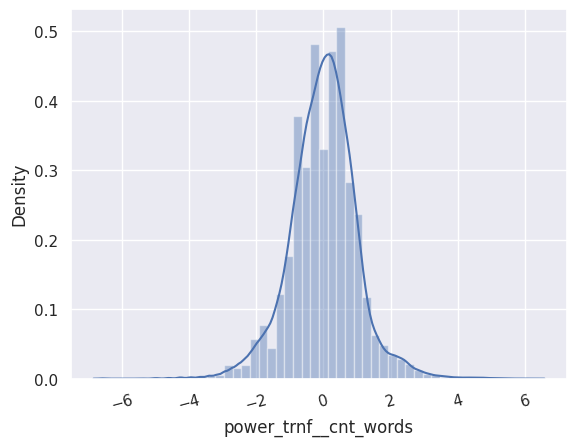

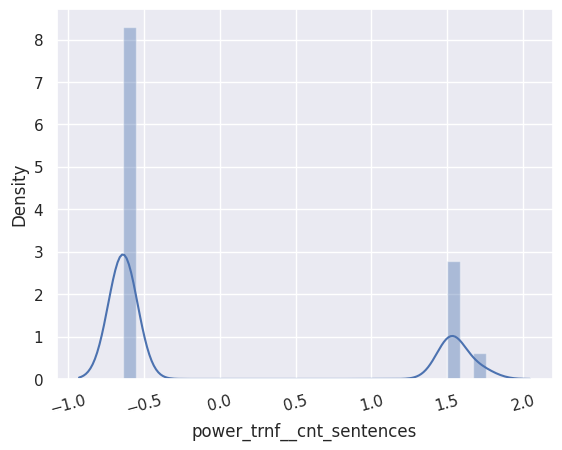

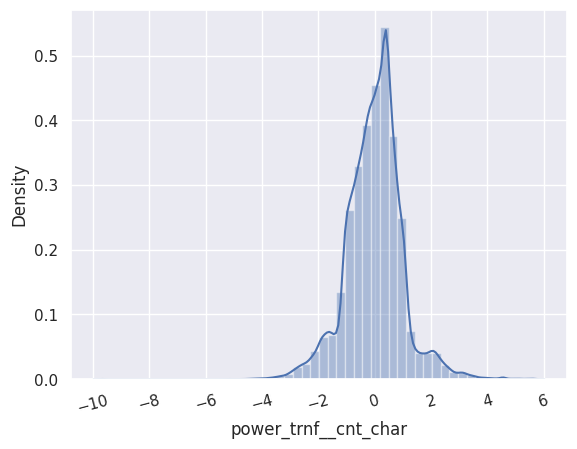

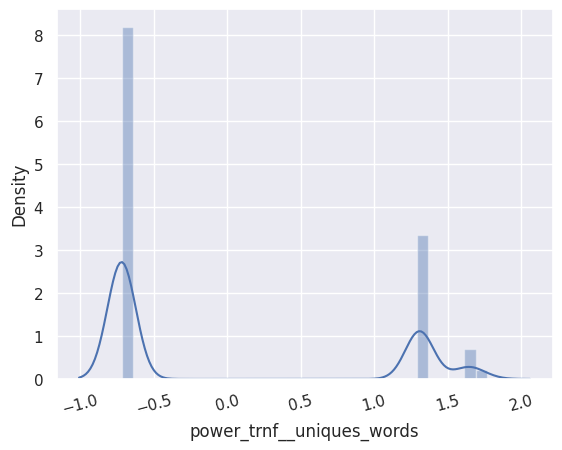

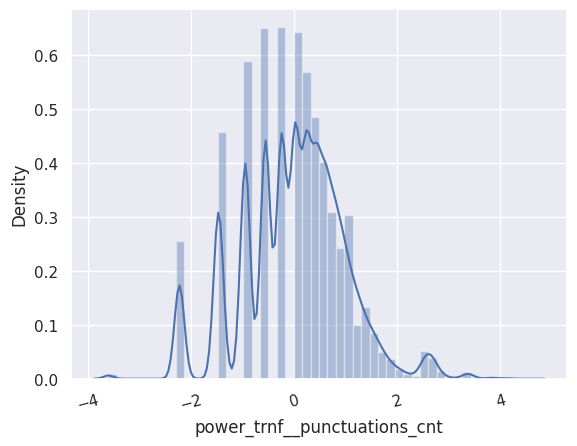

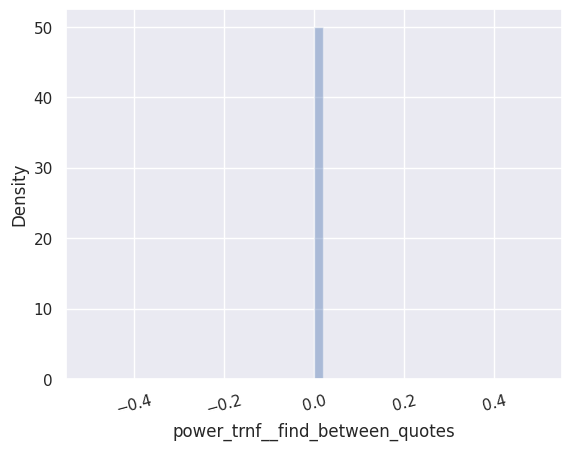

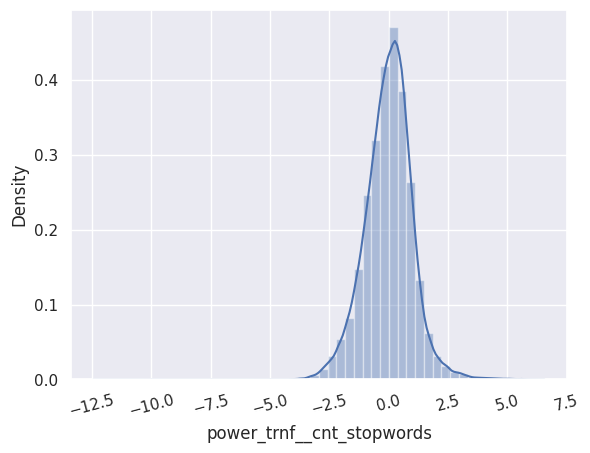

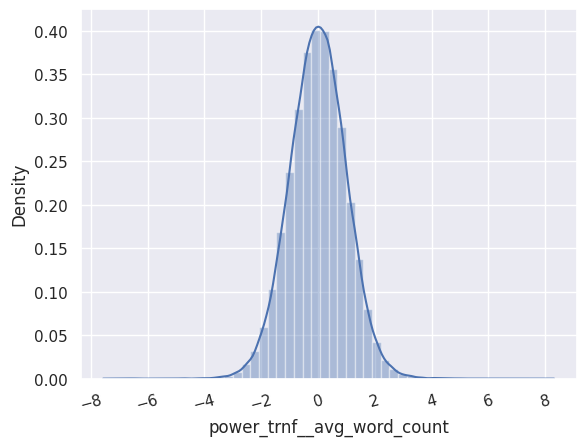

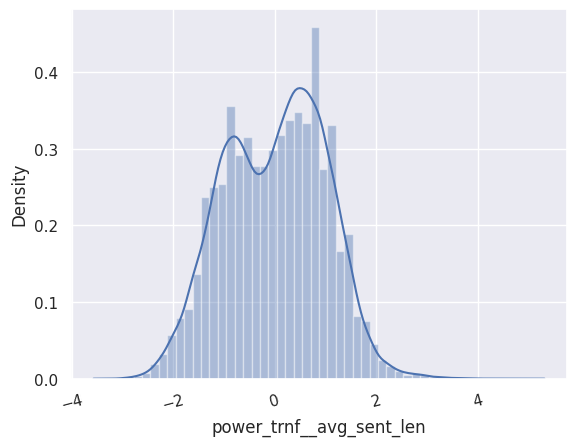

In [81]:
for i in features_trnf:
    # if i != 'tags_initial':
        sns.distplot(train_df_trnf[i])
        plt.xticks(rotation=15)
        plt.show()

In [84]:
train_df.columns

Index(['Class Index', 'Title', 'Description', 'Description_preprocessed', 'Title_processed', 'tags_preprocessed', 'cnt_words', 'cnt_sentences', 'cnt_char', 'tags_initial', 'uniques_words', 'punctuations_cnt', 'find_between_quotes', 'cnt_stopwords', 'avg_word_count', 'avg_sent_len'], dtype='object')

In [85]:
# processed_df = train_df.drop(columns=['Title','Description', 'Class Index', 'tags_initial'])
X = train_df[['tags_preprocessed']]
y = train_df[['Class Index']]

In [86]:
X.head()

,tags_preprocessed
0,wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green
1,carlyle look toward commercial aerospace reuterreuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market
2,oil economy cloud stock outlook reuterreuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum
3,iraq halt oil export main southern pipeline reuterreuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday
4,oil price soar time record pose new menace us economy afpafp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election


In [87]:
y.head()

,Class Index
0,3
1,3
2,3
3,3
4,3


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
#Model Building

In [94]:
#MultinomialNB

In [ ]:
#Model Creation

#MultinomialNB



pipe_mnb = Pipeline([
    ('vect', TfidfVectorizer(lowercase=False)),
    ('mnb', MultinomialNB())
])


params_mnb = {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3)],
        'vect__max_df': [0.25, 0.5, 0.75, 1.0],
        'vect__min_df': [0.001, 0.002, 0.003, 0.004, 0.005, 1],
        'vect__max_features': [3000, 5000, 7000, 9000, 11000, None],
        'vect__binary': [True, False],
        'vect__sublinear_tf': [True, False],
}


gs_mnb = GridSearchCV(pipe_mnb, params_mnb, verbose=10, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
gs_mnb.fit(X_train, y_train)


print('Best accuracy: ', gs_mnb.best_score_, end='\n')
print('Params: ', gs_mnb.best_params_)



Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
